# 1. Đọc dữ liệu

In [1]:
import matplotlib.pyplot as plt
import numpy as np # type: ignore
import pandas as pd

**Nhận xét dữ liệu ban đầu**
-  Dữ liệu ban đầu còn trống nhiều chỗ do thí sinh không thuộc dạng đăng kí môn đó.
-  Có nhiều thí sinh không thi đủ môn đã đăng kí.

Thay những giá trị rỗng thành NaN.

In [2]:
thptqg_pre_proc = pd.read_csv('diem_thptqg_2019.csv')

In [3]:
thptqg_pre_proc

,So Bao Danh,Toan,Ngu Van,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,KHTN,Lich Su,Dia Ly,GDCD,KHXH
0,3000001,4.8,6.50,3.8,NaN,NaN,NaN,NaN,4.25,6.50,8.75,6.50
1,3000002,3.0,2.25,NaN,NaN,NaN,NaN,NaN,2.75,3.00,NaN,NaN
2,3000003,3.2,2.50,NaN,NaN,NaN,NaN,NaN,2.25,3.75,NaN,NaN
3,3000004,5.8,3.25,NaN,NaN,NaN,NaN,NaN,2.50,5.50,NaN,NaN
4,3000005,6.8,6.00,8.6,6.0,3.5,4.25,4.58,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18480,3018571,7.2,4.75,3.0,NaN,NaN,NaN,NaN,5.00,6.00,7.50,6.17
18481,3018572,4.4,7.00,3.6,NaN,NaN,NaN,NaN,3.50,6.25,6.75,5.50
18482,3018573,5.8,5.00,2.8,NaN,NaN,NaN,NaN,2.75,4.50,5.50,4.25
18483,3018574,5.8,4.00,2.8,NaN,NaN,NaN,NaN,5.50,6.50,8.25,6.75


# 2. Xử lý dữ liệu

## 2.1. Thêm cột "Số môn thi"

In [5]:
# Các môn thi
list_of_subjects = ['Toan', 'Ngu Van', 'Ngoai Ngu', 'Vat Ly', 'Hoa Hoc', 'Sinh Hoc', 'Lich Su', 'Dia Ly', 'GDCD']

In [6]:
thptqg_pre_proc['So Mon Thi'] = thptqg_pre_proc[list_of_subjects].notna().sum(axis=1).tolist()
thptqg_pre_proc

,So Bao Danh,Toan,Ngu Van,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,KHTN,Lich Su,Dia Ly,GDCD,KHXH,So Mon Thi
0,3000001,4.8,6.50,3.8,NaN,NaN,NaN,NaN,4.25,6.50,8.75,6.50,6
1,3000002,3.0,2.25,NaN,NaN,NaN,NaN,NaN,2.75,3.00,NaN,NaN,4
2,3000003,3.2,2.50,NaN,NaN,NaN,NaN,NaN,2.25,3.75,NaN,NaN,4
3,3000004,5.8,3.25,NaN,NaN,NaN,NaN,NaN,2.50,5.50,NaN,NaN,4
4,3000005,6.8,6.00,8.6,6.0,3.5,4.25,4.58,NaN,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18480,3018571,7.2,4.75,3.0,NaN,NaN,NaN,NaN,5.00,6.00,7.50,6.17,6
18481,3018572,4.4,7.00,3.6,NaN,NaN,NaN,NaN,3.50,6.25,6.75,5.50,6
18482,3018573,5.8,5.00,2.8,NaN,NaN,NaN,NaN,2.75,4.50,5.50,4.25,6
18483,3018574,5.8,4.00,2.8,NaN,NaN,NaN,NaN,5.50,6.50,8.25,6.75,6


## 2.2. Làm sạch dữ liệu

Thay các giá trị NaN với -1 (biểu thị thí sinh không thi môn đó)

In [7]:
thptqg = thptqg_pre_proc.fillna(-1)

In [8]:
thptqg

,So Bao Danh,Toan,Ngu Van,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,KHTN,Lich Su,Dia Ly,GDCD,KHXH,So Mon Thi
0,3000001,4.8,6.50,3.8,-1.0,-1.0,-1.00,-1.00,4.25,6.50,8.75,6.50,6
1,3000002,3.0,2.25,-1.0,-1.0,-1.0,-1.00,-1.00,2.75,3.00,-1.00,-1.00,4
2,3000003,3.2,2.50,-1.0,-1.0,-1.0,-1.00,-1.00,2.25,3.75,-1.00,-1.00,4
3,3000004,5.8,3.25,-1.0,-1.0,-1.0,-1.00,-1.00,2.50,5.50,-1.00,-1.00,4
4,3000005,6.8,6.00,8.6,6.0,3.5,4.25,4.58,-1.00,-1.00,-1.00,-1.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18480,3018571,7.2,4.75,3.0,-1.0,-1.0,-1.00,-1.00,5.00,6.00,7.50,6.17,6
18481,3018572,4.4,7.00,3.6,-1.0,-1.0,-1.00,-1.00,3.50,6.25,6.75,5.50,6
18482,3018573,5.8,5.00,2.8,-1.0,-1.0,-1.00,-1.00,2.75,4.50,5.50,4.25,6
18483,3018574,5.8,4.00,2.8,-1.0,-1.0,-1.00,-1.00,5.50,6.50,8.25,6.75,6


# 3. Thao tác với dữ liệu

## 3.1. Kiểm tra số học sinh thi mỗi môn

Lấy số học sinh thi mỗi môn

In [11]:
thi_toan = thptqg[thptqg['Toan'] >= 0].count()['Toan']
thi_van = thptqg[thptqg['Ngu Van'] >= 0].count()['Ngu Van']
thi_nn = thptqg[thptqg['Ngoai Ngu'] >= 0].count()['Ngoai Ngu']

thi_ly = thptqg[thptqg['Vat Ly'] >= 0].count()['Vat Ly']
thi_hoa = thptqg[thptqg['Hoa Hoc'] >= 0].count()['Hoa Hoc']
thi_sinh = thptqg[thptqg['Sinh Hoc'] >= 0].count()['Sinh Hoc']

thi_su = thptqg[thptqg['Lich Su'] >= 0].count()['Lich Su']
thi_dia = thptqg[thptqg['Dia Ly'] >= 0].count()['Dia Ly']
thi_gdcd = thptqg[thptqg['GDCD'] >= 0].count()['GDCD']

In [12]:
# Tổng thí sinh
tong_thi_sinh = thptqg.count()['So Bao Danh']

In [14]:
# Các môn thi
subject = ['Toán', 'Ngữ Văn', 'Ngoại Ngữ', 'Vật Lý', 'Hóa Học', 'Sinh Học', 'Lịch Sử', 'Địa Lý',  'GDCD']

# Số thí sinh thi mỗi môn
no_of_stu = [thi_toan, thi_van, thi_nn, thi_ly, thi_hoa, thi_sinh, thi_su, thi_dia, thi_gdcd]

# Phần trăm thí sinh thi mỗi môn
ptram_thi = no_of_stu / tong_thi_sinh

***Dựng hình***

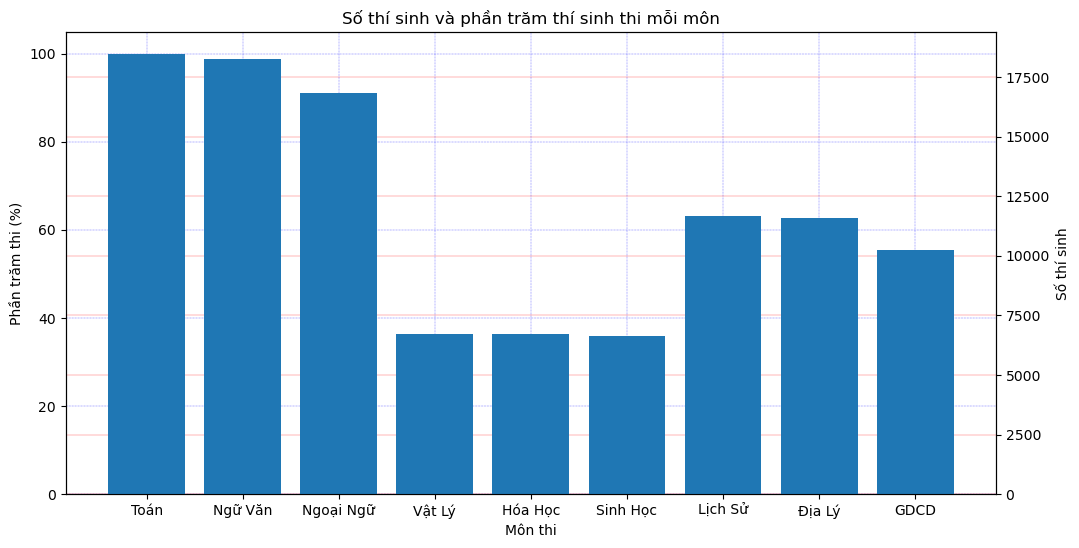

In [15]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)

ax1.bar(subject, ptram_thi * 100)
ax1.set_xlabel('Môn thi')
ax1.set_ylabel('Phần trăm thi (%)')
ax1.grid(color='b', ls='-.', lw = 0.2)
ax1.set_axisbelow(True)

# Biểu diễn chung 1 đồ thị
ax2 = ax1.twinx()

ax2.bar(subject, no_of_stu)
ax2.set_ylabel('Số thí sinh')
ax2.grid(color='r', ls='-', lw = 0.2)
ax2.set_axisbelow(True)

plt.title('Số thí sinh và phần trăm thí sinh thi mỗi môn')
plt.show()

**Kết luận từ dữ liệu:** 
- Thí sinh thi tổ hợp KHXH (Sử + Địa + GDCD) nhiều hơn thí sinh thi tổ hợp KHTN (Lý + Hóa + Sinh). 
- Toán và ngữ văn là các môn bắt buộc nên số thí sinh thi ở 2 môn này chênh lệch nhau không đáng kế

## 3.2. Số học sinh thi x môn

In [16]:
# Cột cần lấy
cols = ['So Bao Danh', 'So Mon Thi']

# Lấy số thí sinh theo số môn thí sinh thi
thptqg_so_mon = thptqg[cols].groupby('So Mon Thi').count().reset_index()

# Đổi tên cột
thptqg_so_mon = thptqg_so_mon.rename(columns={'So Bao Danh': 'So Thi Sinh'})

thptqg_so_mon

,So Mon Thi,So Thi Sinh
0,1,8
1,2,2
2,3,337
3,4,1347
4,5,127
5,6,16631
6,7,5
7,9,28


Các thí sinh phần lớn tham gia từ 3 đến 6 môn. Vậy nên ta sẽ nhóm các thí sinh ở các nhóm khác chung 1 nhóm là 'Other'

In [17]:
other = {'So Mon Thi': 'other', 'So Thi Sinh': thptqg_so_mon[thptqg_so_mon['So Thi Sinh'] < 100].sum()['So Thi Sinh']}
other

{'So Mon Thi': 'other', 'So Thi Sinh': 43}

Thêm row 'other' và xóa các row có số thí sinh < 100

In [14]:
# Xóa các hàng có số thí sinh thấp hơn 100
thptqg_so_mon = thptqg_so_mon.drop(thptqg_so_mon[thptqg_so_mon['So Thi Sinh'] < 100].index)

# Thêm hàng other
thptqg_so_mon = thptqg_so_mon.append(other, ignore_index=True)

thptqg_so_mon

,So Mon Thi,So Thi Sinh
0,3,337
1,4,1347
2,5,127
3,6,16631
4,other,43


***Dựng hình***

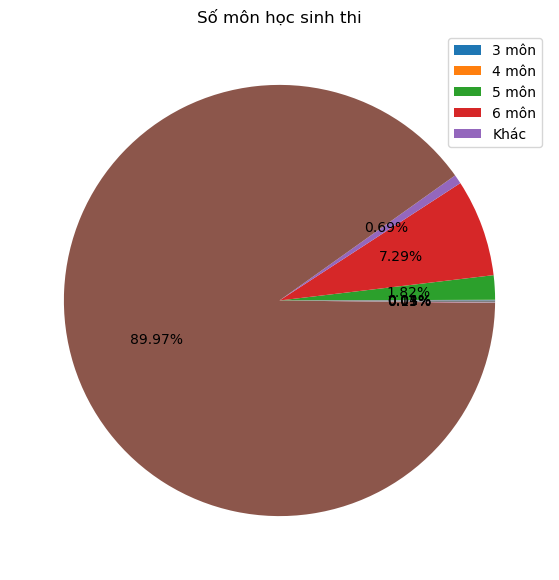

In [18]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)

ax.pie(thptqg_so_mon['So Thi Sinh'], autopct='%.2f%%')

ax.legend(labels=('3 môn', '4 môn', '5 môn', '6 môn', 'Khác'), loc='upper right')
plt.title('Số môn học sinh thi')

plt.show()

**Kết luận từ dữ liệu:**
- Số thí sinh thi 6 môn chiếm đa số, nhiều khả năng là do các bạn thi đủ Toán + Văn + Anh (điều này đúng với bar chart phía trên vì 3 môn này cũng được các bạn thi rất đầy đủ) và một tổ hợp KHTN hoặc KHXH

## 3.3. Điểm trung bình theo số lượng môn thi

In [19]:
# Copy bảng để tránh thao tác trên dữ liệu gốc
thptqg_avg = thptqg.copy()

# Tạo cột 'điểm trung bình'
thptqg_avg['Diem Trung Binh'] = thptqg_avg[thptqg_avg[list_of_subjects] >= 0].mean(axis=1).round(2).tolist()

thptqg_avg

,So Bao Danh,Toan,Ngu Van,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,KHTN,Lich Su,Dia Ly,GDCD,KHXH,So Mon Thi,Diem Trung Binh
0,3000001,4.8,6.50,3.8,-1.0,-1.0,-1.00,-1.00,4.25,6.50,8.75,6.50,6,5.77
1,3000002,3.0,2.25,-1.0,-1.0,-1.0,-1.00,-1.00,2.75,3.00,-1.00,-1.00,4,2.75
2,3000003,3.2,2.50,-1.0,-1.0,-1.0,-1.00,-1.00,2.25,3.75,-1.00,-1.00,4,2.92
3,3000004,5.8,3.25,-1.0,-1.0,-1.0,-1.00,-1.00,2.50,5.50,-1.00,-1.00,4,4.26
4,3000005,6.8,6.00,8.6,6.0,3.5,4.25,4.58,-1.00,-1.00,-1.00,-1.00,6,5.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18480,3018571,7.2,4.75,3.0,-1.0,-1.0,-1.00,-1.00,5.00,6.00,7.50,6.17,6,5.58
18481,3018572,4.4,7.00,3.6,-1.0,-1.0,-1.00,-1.00,3.50,6.25,6.75,5.50,6,5.25
18482,3018573,5.8,5.00,2.8,-1.0,-1.0,-1.00,-1.00,2.75,4.50,5.50,4.25,6,4.39
18483,3018574,5.8,4.00,2.8,-1.0,-1.0,-1.00,-1.00,5.50,6.50,8.25,6.75,6,5.48


In [20]:
# Cột cần lấy
cols = ['So Mon Thi', 'Diem Trung Binh']

# Lấy điểm trung bình theo số môn thí sinh thi
thptqg_avg = thptqg_avg[cols].groupby('So Mon Thi').mean().round(2).reset_index()

thptqg_avg

,So Mon Thi,Diem Trung Binh
0,1,1.91
1,2,4.78
2,3,5.79
3,4,3.96
4,5,5.69
5,6,5.80
6,7,4.37
7,9,5.37


Do không có thí sinh nào thi 8 môn, mình sẽ thêm một hàng 8 môn có điểm trung bình là 0, biểu thị là không có thí sinh thi 8 môn.

In [ ]:
# Tạo df mới có dữ liệu 8 - 0
add_df = pd.DataFrame({'So Mon Thi': 8, 'Diem Trung Binh': 0}, index=[6.5])

# Nối thptqg_avg với add_df
thptqg_avg = pd.concat([thptqg_avg, add_df], ignore_index=False)

# Sort lại thptqg_avg theo index
thptqg_avg = thptqg_avg.sort_index().reset_index(drop=True)

thptqg_avg

NameError: name 'thptqg' is not defined

In [24]:
# Thiết lập các tham số cần thiết
so_mon = thptqg_avg['So Mon Thi'].tolist()
diem_trung_binh = thptqg_avg['Diem Trung Binh'].tolist()

***Dựng hình***

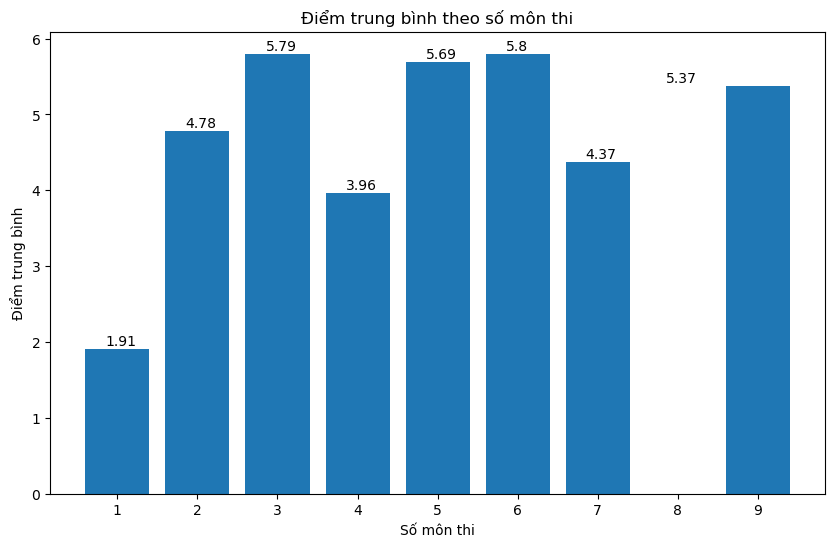

In [25]:
fig = plt.figure(figsize=(10, 6))
plt.bar(so_mon, diem_trung_binh)

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xlabel('Số môn thi')
plt.ylabel('Điểm trung bình')
plt.title('Điểm trung bình theo số môn thi')

# Thêm giá trị thực vào phía trên mỗi bar
for index, value in enumerate(diem_trung_binh):
    plt.text(index + 0.85, value + 0.05, str(value))

plt.show()

**Kết luận từ dữ liệu:**
- Không có ai thi 8 môn
- Điểm trung bình theo số môn thi không chạm đến ngưỡng khá (6 điểm)

## 3.4. Phổ điểm một số môn

**Ví dụ: Xét phổ điểm môn Toán**

In [26]:
# Lấy số thí sinh theo điểm toán họ đạt được
thptqg_toan = pd.read_csv('diem_thptqg_2019.csv')[['So Bao Danh', 'Toan']].groupby('Toan').count().reset_index()

# Đổi tên cột
thptqg_toan = thptqg_toan.rename(columns={'So Bao Danh': 'So Thi Sinh'})

Bổ sung các đầu điểm còn thiếu để biểu diễn dữ liệu (0.0, 0.2, 0.4, 0.8, 10.0)

In [22]:
# Tạo df mới có dữ liệu 8 - 0
add_df = pd.DataFrame({'Toan': [0.0, 0.2, 0.4, 0.6, 0.8, 10.0], 'So Thi Sinh': [0, 0, 0, 0, 0, 0]}, index=[0.25, 0.5, 0.75, 0.95, 1.5, 47])

# Nối thptqg_avg với add_df
thptqg_toan = thptqg_toan.append(add_df, ignore_index=False)

# Sort lại thptqg_avg theo index
thptqg_toan = thptqg_toan.sort_index().reset_index(drop=True)

Bỏ hàng có điểm toán = -1 (biểu thị thí sinh bỏ thi)

In [23]:
thptqg_toan = thptqg_toan.drop(0).reset_index(drop=True)
thptqg_toan

,Toan,So Thi Sinh
0,0.0,0
1,0.2,0
2,0.4,0
3,0.6,0
4,0.6,2
5,0.8,0
6,1.0,2
7,1.2,6
8,1.4,21
9,1.6,28


Thiết lập các tham số cần thiết

In [24]:
diem_toan = thptqg_toan['Toan'].tolist()
so_thi_sinh = thptqg_toan['So Thi Sinh'].tolist()

***Dựng hình***

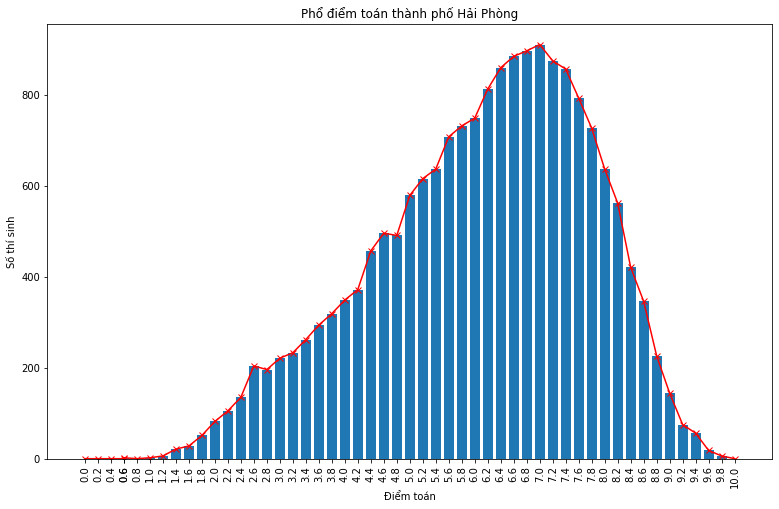

In [25]:
fig = plt.figure(figsize=(13, 8))

plt.plot(diem_toan, so_thi_sinh, 'rx-')
plt.bar(diem_toan, so_thi_sinh, width=0.15)

plt.xticks(diem_toan, rotation=90)
plt.xlabel('Điểm toán')
plt.ylabel('Số thí sinh')
plt.title('Phổ điểm toán thành phố Hải Phòng')

plt.show()

**Kết luận từ dữ liệu:**
- Phổ điểm hình chuông, đỉnh lệch trái nhẹ.
- Đỉnh điểm rơi vào khoảng 6.8 – 7.4, là mức phổ biến nhất.
- Số lượng thí sinh đạt điểm từ 4.0 – 9.0 rất cao → đề có tính phân loại rõ.
- Rất ít thí sinh đạt điểm dưới 2.0 hoặc trên 9.5, cho thấy đề thi kiểm soát tốt hai đầu phân phối.

**Xét phổ điểm môn Ngữ Văn**

In [ ]:
# Lấy số thí sinh theo điểm toán họ đạt được
thptqg_van = pd.read_csv('diem_thptqg_2019.csv')[['So Bao Danh', 'Ngu Van']].groupby('Ngu Van').count().reset_index()

# Đổi tên cột
thptqg_van = thptqg_van.rename(columns={'So Bao Danh': 'So Thi Sinh'})

In [9]:
# Tạo df mới có dữ liệu 8 - 0
add_df = pd.DataFrame({'Ngu Van': [0.0, 0.2, 0.4, 0.6, 0.8, 10.0], 'So Thi Sinh': [0, 0, 0, 0, 0, 0]}, index=[0.25, 0.5, 0.75, 0.95, 1.5, 47])

# Nối thptqg_avg với add_df
thptqg_van = thptqg_van.sort_index().reset_index(drop=True)


# Sort lại thptqg_avg theo index
thptqg_van = thptqg_van.sort_index().reset_index(drop=True)

Bỏ hàng có điểm toán = -1 (biểu thị thí sinh bỏ thi)

In [10]:
thptqg_van = thptqg_van.drop(0).reset_index(drop=True)
thptqg_van

,Ngu Van,So Thi Sinh
0,0.25,4
1,0.50,7
2,0.75,9
3,1.00,8
4,1.25,31
5,1.50,44
6,1.75,51
7,2.00,100
8,2.25,94
9,2.50,134


Thiết lập các tham số cần thiết

In [11]:
diem_van = thptqg_van['Ngu Van'].tolist()
so_thi_sinh = thptqg_van['So Thi Sinh'].tolist()

***Dựng hình***

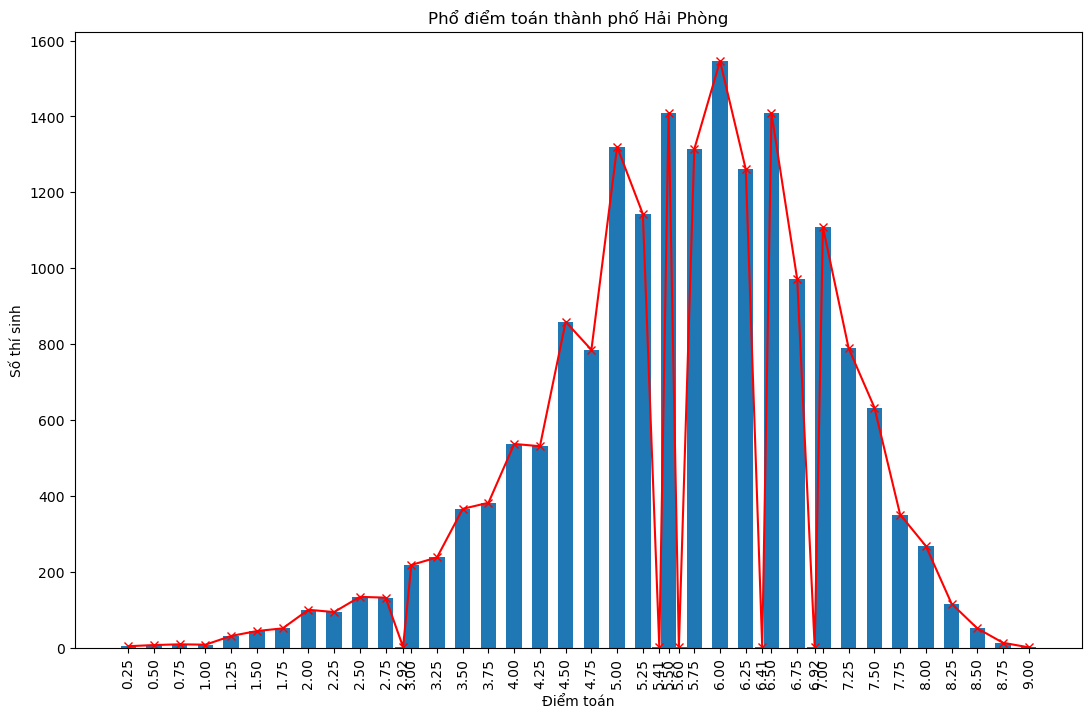

In [12]:
fig = plt.figure(figsize=(13, 8))

plt.plot(diem_van, so_thi_sinh, 'rx-')
plt.bar(diem_van, so_thi_sinh, width=0.15)

plt.xticks(diem_van, rotation=90)
plt.xlabel('Điểm toán')
plt.ylabel('Số thí sinh')
plt.title('Phổ điểm toán thành phố Hải Phòng')

plt.show()

**Kết luận từ dữ liệu:**
- Phổ điểm có dạng gần đối xứng, phân bố chuẩn lệch phải nhẹ.
- Đỉnh phổ nằm khoảng 5.5 – 6.5 điểm, là mức phổ biến nhất.
- Có một số điểm rớt đột ngột, như 5.4 và 6.4, có thể do lỗi dữ liệu hoặc không có thí sinh đạt điểm đó.
- Ít thí sinh đạt điểm thấp dưới 2.0 hoặc cao trên 8.5, cho thấy đề có tính phân loại tốt.

**Xét phổ điểm Ngoại Ngữ**

In [13]:
# Lấy số thí sinh theo điểm toán họ đạt được
thptqg_nn = pd.read_csv('diem_thptqg_2019.csv')[['So Bao Danh', 'Ngoai Ngu']].groupby('Ngoai Ngu').count().reset_index()

# Đổi tên cột
thptqg_nn = thptqg_nn.rename(columns={'So Bao Danh': 'So Thi Sinh'})

# Tạo df mới có dữ liệu 8 - 0
add_df = pd.DataFrame({'Ngoai Ngu': [0.0, 0.2, 0.4, 0.6, 0.8, 10.0], 'So Thi Sinh': [0, 0, 0, 0, 0, 0]}, index=[0.25, 0.5, 0.75, 0.95, 1.5, 47])

# Nối thptqg_avg với add_df
thptqg_nn = thptqg_nn.sort_index().reset_index(drop=True)


# Sort lại thptqg_avg theo index
thptqg_nn = thptqg_nn.sort_index().reset_index(drop=True)

thptqg_nn = thptqg_nn.drop(0).reset_index(drop=True)
thptqg_nn

,Ngoai Ngu,So Thi Sinh
0,0.8,1
1,1.0,4
2,1.2,17
3,1.4,36
4,1.6,87
5,1.8,154
6,2.0,278
7,2.2,380
8,2.4,548
9,2.6,649


Thiết lập các tham số cần thiết

In [14]:
diem_nn = thptqg_nn['Ngoai Ngu'].tolist()
so_thi_sinh = thptqg_nn['So Thi Sinh'].tolist()

***Dựng hình***

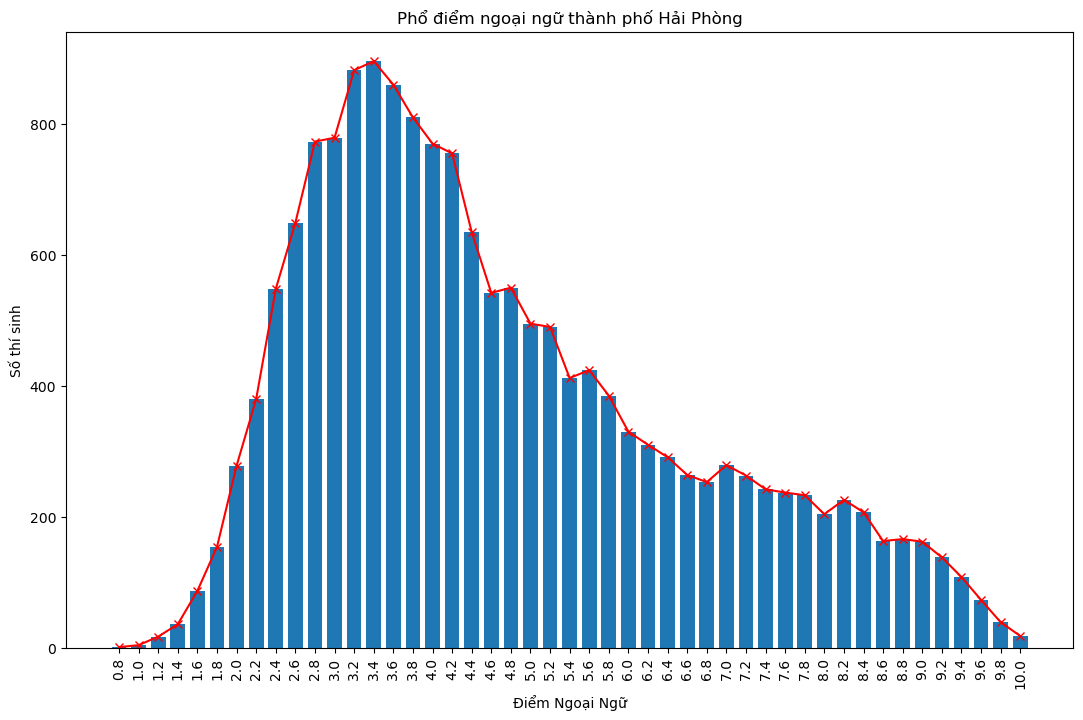

In [15]:
fig = plt.figure(figsize=(13, 8))

plt.plot(diem_nn, so_thi_sinh, 'rx-')
plt.bar(diem_nn, so_thi_sinh, width=0.15)

plt.xticks(diem_nn, rotation=90)
plt.xlabel('Điểm Ngoại Ngữ')
plt.ylabel('Số thí sinh')
plt.title('Phổ điểm ngoại ngữ thành phố Hải Phòng')

plt.show()

**Kết luận từ dữ liệu:**
- Phổ điểm có dạng lệch phải rõ rệt → nhiều thí sinh đạt điểm thấp.
- Đỉnh phổ nằm ở khoảng 3.0 – 3.6, là mức điểm phổ biến nhất.
- Số thí sinh đạt điểm từ 6.0 trở lên giảm dần rõ rệt, chỉ một phần nhỏ đạt điểm cao.
- Điều này cho thấy môn Ngoại ngữ là môn khó, phân hóa mạnh và học sinh chưa đồng đều về năng lực.

***So sánh tổng quan phổ điểm 3 môn (Toán-Văn-Ngoại Ngữ)***
|      Tiêu chí     |          Toán       |            Văn            |          Ngoại ngữ          |
| ----------------- |:-------------------:| :-----------------------: |:---------------------------:|
| Dạng phổ:         | Gần chuẩn, cân đối  | Gần chuẩn, hơi lệch phải  | Lệch phải mạnh              |
| Đỉnh phổ điểm:    | ~6.8 – 7.4          | ~5.5 – 6.5                | ~3.0 – 3.6                  |
| Phân bố điểm cao: | Rộng (tới ~9.8)     | Có nhưng ít, đứt đoạn     | Có, nhưng ít và rời rạc     |
| Điểm thấp:        | Hiếm                | Có nhưng không nhiều      | Rất nhiều học sinh dưới 4.0 |
| Mức phân hóa:     | Tốt, rõ ràng        | Tương đối tốt             | Phân hóa rất cao            |
| Tính liên tục:    | Mượt                | Có chỗ bị đứt nhịp        | Dao động răng cưa           |

**Môn Toán**
- Phổ chuẩn lý tưởng, phân bố gần đối xứng với đỉnh ~6.8–7.4.
- Trải đều từ 0–10, có rất ít học sinh đạt điểm tuyệt đối hoặc quá thấp → đề thi có tính phân loại tốt.
- Không xuất hiện rớt dữ liệu hay chênh lệch bất thường.
- Giá trị giáo dục:
    - Học sinh có nền tảng tương đối đồng đều.
    - Có thể sử dụng phổ này làm chuẩn đối chiếu cho các môn khác.

**Môn Văn** 
- Đỉnh nằm quanh 5.5–6.5, lệch phải nhẹ.
- Có hiện tượng thiếu dữ liệu ở một vài điểm số cụ thể (5.4, 6.4 → cột trống).
- Nguyên nhân có thể là:
- Dữ liệu gốc bị làm tròn hoặc lọc sai.
- Một số điểm lẻ (x.4, x.6) ít thí sinh đạt, nhưng cần xác minh kỹ.
- Phổ vẫn có dạng mượt, cho thấy học sinh có kỹ năng viết ở mức khá đồng đều.
- Giá trị giáo dục:
    - Văn là môn tự luận, nên điểm có thể bị gián đoạn do khung chấm không tinh chỉnh kỹ.

**Môn Ngoại Ngữ**
- Phổ lệch phải rất rõ:
    - Đỉnh điểm thấp (~3.0–3.6) → rất nhiều học sinh đạt điểm dưới trung bình.
    - Điểm giảm dần từ 4.0 đến 10.0, phần đuôi dài và răng cưa.
- Dễ nhận thấy: học sinh phân bố không đều, rơi vào 2 nhóm chính:
    - Nhóm yếu (~2.0 – 4.0) rất đông.
    - Nhóm khá – giỏi (~7.0 – 10.0) tuy nhỏ nhưng vẫn tồn tại → có thể do học thêm chuyên sâu hoặc ôn luyện kỹ.
- Giá trị giáo dục:
    - Phản ánh sự chênh lệch lớn trong việc học Ngoại ngữ.
    - Có thể cần tăng cường hỗ trợ học sinh yếu và chuẩn hóa đầu vào dạy học.